In [1]:
import random
import numpy as np

SEED = 42
random.seed(SEED)
REBOUND_TIME = 10 # Time to get the rebound and take the next shot in seconds
THREE_PT_PCT = 0.4 # 3-pointer percentage constant
THREE_PT_GOAL = 4 # Number of consecutive 3's needed to move on to the next stage
FT_PCT = 0.8 # Free throw percentage constant
FT_GOAL = 4 # Number of consecutive free throws needed to move on to the next stage
N_TRIALS = 100000 # Number of trials to average the data

In [2]:
threes = 0
fts = 0
X = []
for i in range(N_TRIALS):
    time = 0
    cont3 = True
    contft = True
    ft_count = 0
    while(contft): # Outer loop: Continue shooting free throws until make FT_GOAL in a row
        three_count = 0
        while(cont3): # Inner loop: Continue shooting 3's until make THREE_PT_GOAL in a row
            if random.random() < THREE_PT_PCT: #made 3
                three_count += 1
            else: #missed 3
                three_count = 0
            time += 1
            threes+=1
            if(three_count == THREE_PT_GOAL): # Condition to stop shooting 3's and switch to free throws
                cont3 = False

        if random.random() < FT_PCT: #made ft
            ft_count += 1
        else: #missed ft
            ft_count = 0
            cont3 = True # Go back to shooting 3's
        time += 1
        fts += 1
        if(ft_count == FT_GOAL): # Condition to that the exercise is complete
            contft = False
    X.append(time*REBOUND_TIME/60) # Store the total time of the drill in minutes

In [3]:
avgtime = sum(X)/len(X)
maximum = max(X)
minimum = min(X)
arr = np.array(X)
print(f"Average time = {int(avgtime//1)} minutes, {(avgtime%1)*60:.0f} seconds")
print(f"Maximum time of X = {int((maximum/60)//1)} hours, {int((((maximum/60)%1)*60)//1)} minutes, {(maximum%1)*60:.0f} seconds")
print(f"Minimum time of X = {int(minimum//1)} minutes, {(minimum%1)*60:.0f} seconds")
print(f"Number of times that the minimum value is achieved = {np.sum(arr==minimum)}")
print(f"Percentage that the minimum is achieved = {(np.sum(arr==minimum)*100)/len(X):.4f}%")
print(f"Percentage of shots that are 3 pointers = {100*threes/(threes+fts):.4f}%")

Average time = 27 minutes, 2 seconds
Maximum time of X = 5 hours, 0 minutes, 10 seconds
Minimum time of X = 1 minutes, 20 seconds
Number of times that the minimum value is achieved = 997
Percentage that the minimum is achieved = 0.9970%
Percentage of shots that are 3 pointers = 95.5484%


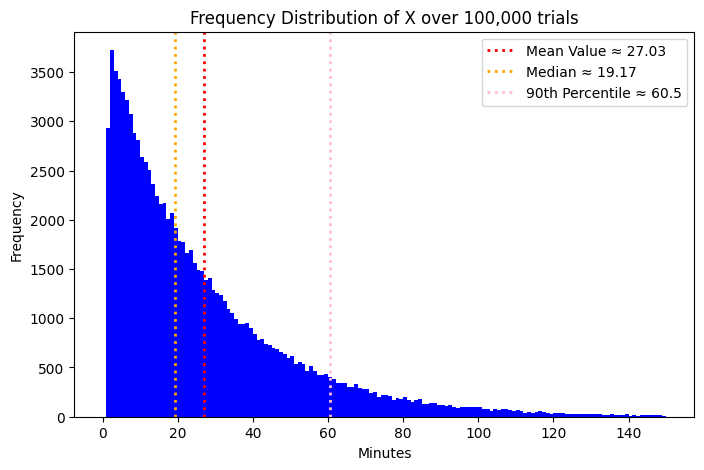

In [4]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))

# Create a histogram
plt.hist(X, bins = 150, range = (0,150), color='blue')

percentile_90 = np.percentile(X, 90)
median = np.median(X)

plt.axvline(avgtime, color='red', linestyle='dotted', linewidth=2, label='Mean Value ≈ ' + str(round(avgtime,2)))
plt.axvline(median, color='orange', linestyle='dotted', linewidth=2, label='Median ≈ ' + str(round(median,2)))
plt.axvline(percentile_90, color='pink', linestyle='dotted', linewidth=2, label='90th Percentile ≈ ' + str(round(percentile_90,2)))

# Add titles and labels
plt.title(f'Frequency Distribution of X over {N_TRIALS:,} trials')
plt.xlabel('Minutes')
plt.ylabel('Frequency')

plt.legend()
plt.savefig(f'histogram_plot_{SEED}_{N_TRIALS}.png', dpi=300, bbox_inches='tight')
plt.show()